In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

import pickle

## Load the training dataset

In [23]:
train_df = pd.read_csv("../data/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
print(f"size of training dataset: {train_df.size}\n")
print(f"Shape of training dataset: {train_df.shape}\n")
train_df.sample(10)

size of training dataset: 21552175

Shape of training dataset: (27455, 785)



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
5826,0,204,204,206,207,209,212,212,214,214,...,129,106,154,246,255,239,210,191,193,115
19799,14,140,143,146,148,150,152,154,155,155,...,203,203,204,205,205,206,206,205,205,204
22414,18,181,183,185,185,187,187,186,187,187,...,115,95,74,128,177,208,210,162,130,121
10639,0,171,174,173,172,173,173,173,173,175,...,52,21,53,209,191,193,193,193,194,194
18777,3,151,151,152,153,154,153,155,155,155,...,207,204,196,176,150,109,70,51,43,43
15352,7,192,193,194,195,194,194,193,195,195,...,127,148,156,162,165,173,175,173,178,185
13618,7,158,158,157,158,159,158,158,157,157,...,133,135,141,144,142,147,154,135,129,136
16834,15,73,76,82,91,100,108,113,116,118,...,26,20,15,14,10,5,0,109,196,179
15868,12,134,137,139,141,142,145,147,149,151,...,189,188,188,186,186,185,185,183,183,182
946,19,242,242,243,244,243,245,246,244,242,...,176,210,218,234,248,245,224,235,227,183


## Exploration on dataset

In [11]:
print("info about dataset\n")
print(train_df.info())

print("\nTotal number of columns with null value\n")
print(train_df.isna().sum())

info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None

Total number of columns with null value

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [12]:
print("\nDescibe the dataset")
print(train_df.describe())


Descibe the dataset
              label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.318813    145.419377    148.500273    151.247714    153.546531   
std        7.287552     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max       24.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125

In [ ]:
for label in sorted(train_df["label"].unique()):
    count = (train_df["label"] == label).sum()
    print(f"total number for {label}: {count}")

label_counts = train_df["label"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(label_counts.index, label_counts.values, color="steelblue", edgecolor="white")
plt.xlabel("Letter")
plt.ylabel("Number")
plt.title("Distribution of each letter of training data")
plt.xticks(label_counts.index)
plt.tight_layout()
plt.show()

total number for 0: 1126
total number for 1: 1010
total number for 2: 1144
total number for 3: 1196
total number for 4: 957
total number for 5: 1204
total number for 6: 1090
total number for 7: 1013
total number for 8: 1162
total number for 10: 1114
total number for 11: 1241
total number for 12: 1055
total number for 13: 1151
total number for 14: 1196
total number for 15: 1088
total number for 16: 1279
total number for 17: 1294
total number for 18: 1199
total number for 19: 1186
total number for 20: 1161
total number for 21: 1082
total number for 22: 1225
total number for 23: 1164
total number for 24: 1118


## Split data into features (X) and labels (y)

In [28]:
np.random.seed(42)
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

print(f"Training samples: {X_train.shape[0]}, Features: {X_train.shape[1]}, Classes: {len(np.unique(y_train))}")

Training samples: 27455, Features: 784, Classes: 24


## Load the test dataset

In [29]:
test_df = pd.read_csv("../data/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
test_df.shape, test_df.size

((7172, 785), 5630020)

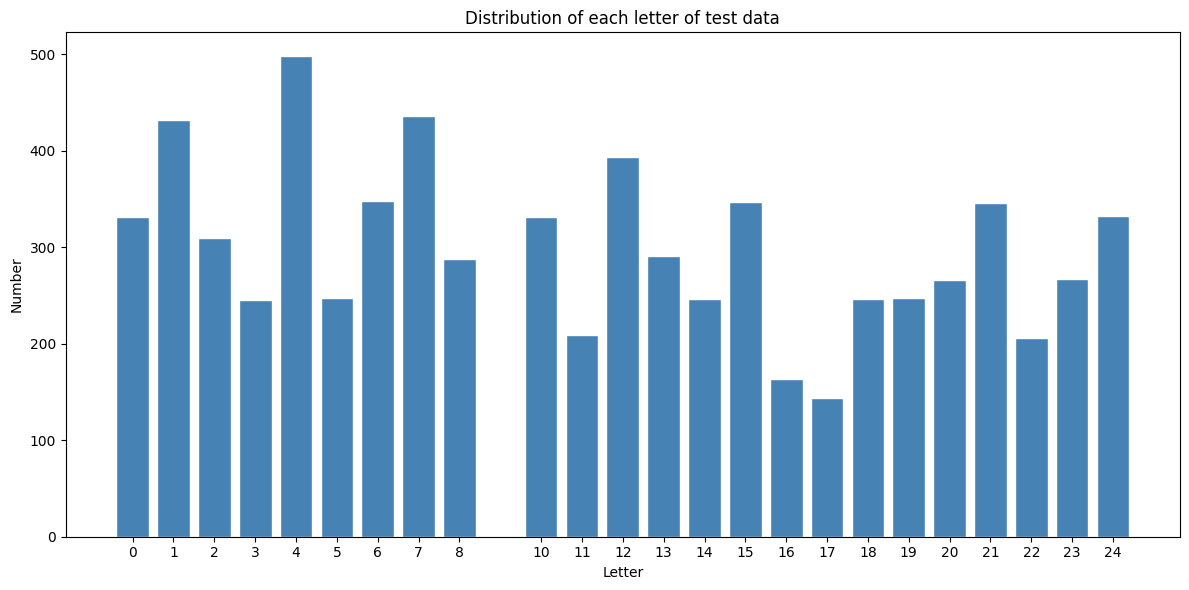

In [32]:
test_label_counts = test_df["label"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(test_label_counts.index, test_label_counts.values, color="steelblue", edgecolor="white")
plt.xlabel("Letter")
plt.ylabel("Number")
plt.title("Distribution of each letter of test data")
plt.xticks(test_label_counts.index)
plt.tight_layout()
plt.show()

## split the testing dataset into feature and labels

In [33]:
X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

## Train the baseline model (Random Forest)

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [35]:
model.score(X_test, y_test)

0.8117679866146124

## Prediction

In [43]:
y_pred = model.predict(X_test)
y_pred

array([ 6,  5, 10, ...,  2,  4,  2], shape=(7172,))

In [44]:
np.array(y_test)

array([ 6,  5, 10, ...,  2,  4,  2], shape=(7172,))

## Evaluate different metrices

In [45]:
print(f"Accuracy:  {model.score(X_test, y_test):.4f}")
print(f"F1 (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")

Accuracy:  0.8118
F1 (macro): 0.7931
Precision (macro): 0.8015
Recall (macro): 0.8029


## Confusion metrix

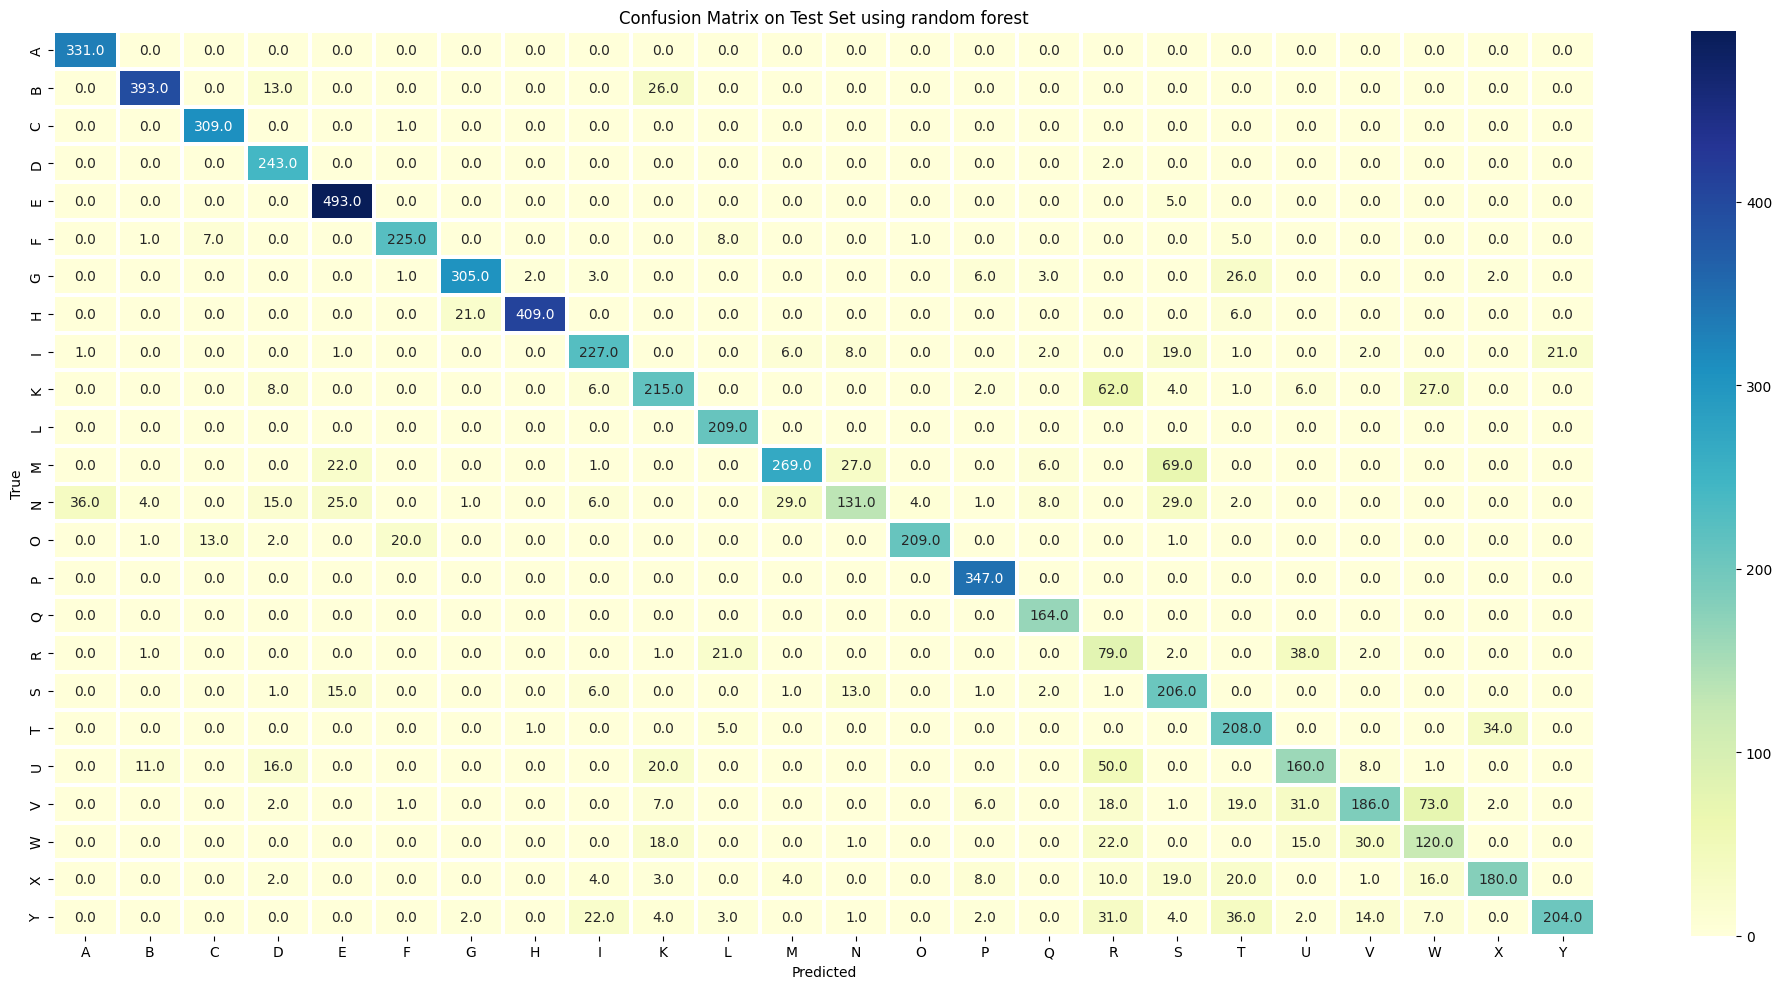

In [63]:
conff_matrix = confusion_matrix(y_test, y_pred)
class_labels = list("ABCDEFGHI") + list("KLMNOPQRSTUVWXY")  # dataset is missing J, and Z
plt.figure(figsize=(20, 10))
sns.heatmap(conff_matrix, annot=True, linewidths=1.5, fmt=".1f", cmap="YlGnBu", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Test Set using random forest")
plt.tight_layout()
plt.show()

In [67]:
MODEL_PATH = "baseline_model.pkl"
with open(MODEL_PATH, "wb") as f:
        pickle.dump(model, f)
print(f"Model is saved as {MODEL_PATH}")

Model is saved as baseline_model.pkl
